# Teoría y Landscape de Visualización

Los objetivos de esta clase son:

* Comprender la importancia de las visualizaciones.
* Conocer las librerías de visualización en Python.

Aprender sobre visualizaciones es importante ya que:

* Un resultado no sirve si no puede comunicarse correctamente.
* Una buena visualización dista de ser una tarea trivial.
* Un ingenierio necesita producir excelentes gráficos (pero nadie enseña cómo).

## ¿Exageración?

Lamentablemente no es una exageración, en ocasiones se cometen errores que lo único que es confundir o inclusive podrían ser errores intencionales para influir en la percepción del observador.

![example1](../images/Fox1.png)

![example2](../images/Fox2.png)

![example3](../images/Fox3.png)

![example4](../images/male_height.jpg)

![example3](../images/pinera.jpg)

## Primeras visualizaciones

* Campaña de Napoleón a Moscú (Charles Minard, 1889)

![napoleon](../images/Napoleon.png)
* Mapa del cólera (John Snow, 1855)

![colera](../images/Colera.png)

## ¿Por qué utilizamos gráficos para representar datos?

* El 70 % de los receptores sensoriales del cuerpo humano está dedicado a la visión.
* Cerebro ha sido entrenado evolutivamente para interpretar la información visual de manera masiva.

    _“The eye and the visual cortex of the brain form a massively
    parallel processor that provides the highest bandwidth channel
    into human cognitive centers”
    — Colin Ware, Information Visualization, 2004._

## Ejemplo: Cuarteto de ANSCOMBE 

Considere los siguientes 4 conjuntos de datos. 

¿Qué puede decir de los datos?

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join("..", "data","anscombe.csv"))
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [3]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


¿Por qué es un ejemplo clásico?

In [4]:
for i in range(1, 4 + 1):
    x = df.loc[:, f"x{i}"].values
    y = df.loc[:, f"y{i}"].values
    slope, intercept = np.polyfit(x, y, 1)
    print(f"Grupo {i}:\n\tTiene pendiente {slope:.2f} e intercepto {intercept:.2f}.\n")

Grupo 1:
	Tiene pendiente 0.50 e intercepto 3.00.

Grupo 2:
	Tiene pendiente 0.50 e intercepto 3.00.

Grupo 3:
	Tiene pendiente 0.50 e intercepto 3.00.

Grupo 4:
	Tiene pendiente 0.50 e intercepto 3.00.



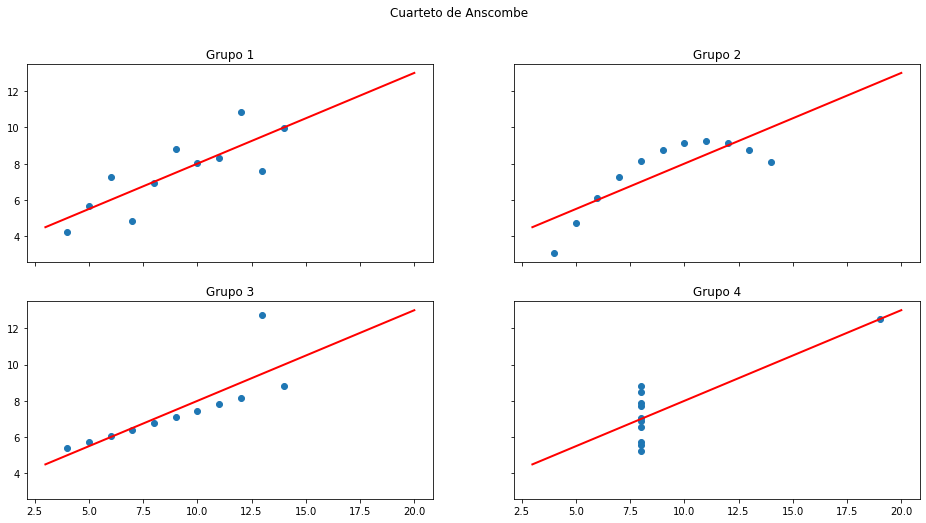

In [5]:
groups = range(1, 4 + 1)
x_columns = [col for col in df if "x" in col]
x_aux = np.arange(
    df.loc[:, x_columns].values.min() - 1,
    df.loc[:, x_columns].values.max() + 2
)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), sharex=True, sharey=True)
fig.suptitle("Cuarteto de Anscombe")
for i, ax in zip(groups, axs.ravel()):
    x = df.loc[:, f"x{i}"].values
    y = df.loc[:, f"y{i}"].values
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, y, 'o')
    ax.plot(x_aux, m * x_aux + b, 'r', lw=2.0)
    ax.set_title(f"Grupo {i}")

    


## Teoría

###  Sistema visual humano

* Buenas noticias
    - Gráficos entregan información que la estadística podría no revelar.
    - Despliegue visual es esencial para comprensión. 
* Malas noticias 
    - La atención es selectiva y puede ser fácilmente engañada.

Ejemplos de que la atención es selectiva y que puede ser fácilmente engañada.

![IO1a](../images/IO1a.png)

![IO1b](../images/IO1b.png)

![IO2a](../images/IO2a.png)

![IO2b](../images/IO2b.png)

### Consejos generales

Noah Illinsky, en su charla "Cuatro pilatres de la visualización" ([es](https://www.youtube.com/watch?v=nC92wIzpQFE), [en](https://www.youtube.com/watch?v=3eZ15VplE3o)), presenta buenos consejos sobre cómo realizar una correcta visualización:
* Propósito
* Información/Contenido
* Codificación/Estructura
* Formato

Es altamente aconsejable ver el video, pero en resumen:

* **Propósito** o público tiene que ver con para quién se está preparando la viz y que utilidad se le dará. Es muy diferente preparar un gráfico orientado a información y toma de decisiones.
* **Información/Contenido** se refiere a contar con la información que se desea mostrar, en el formato necesario para su procesamiento.
* **Codificación/Estructura** tiene que ver con la selección correcta de la codificación y estructura de la información.
* **Formato** tiene que ver con la elección de fuentes, colores, tamaños relativos, etc.

Lo anterior indica que una visualización no es el resultado de unos datos. Una visualización se diseña, se piensa, y luego se buscan fuentes de información apropiadas.

### Elementos para la creación de una buena visualización

1. ***Honestidad***: representaciones visuales no deben engañar al observador.
2. ***Priorización***: dato más importante debe utilizar elemento de mejor percepción.
3. ***Expresividad***: datos deben utilizar elementos con atribuciones adecuadas.
4. ***Consistencia***: codificación visual debe permitir reproducir datos.

El principio básico a respetar es que a partir del gráfico uno debe poder reobtener fácilmente los datos originales.

#### Honestidad
El ojo humano no tiene la misma precisión al estimar distintas atribuciones:
* **Largo**: Bien estimado y sin sesgo, con un factor multiplicativo de 0.9 a 1.1.
* **Área**: Subestimado y con sesgo, con un factor multiplicativo de 0.6 a 0.9.
* **Volumen**: Muy subestimado y con sesgo, con un factor multiplicativo de 0.5 a 0.8.

Resulta inadecuado realizar gráficos de datos utilizando áreas o volúmenes buscando inducir a errores.

![honesty1](../images/Honestidad1.png)

Resulta inadecuado realizar gráficos de datos utilizando áreas o volúmenes si no queda claro la atribución utilizada.

![honesty2](../images/Honestidad2.png)

Una pseudo-excepción la constituyen los _pie-chart_ o gráficos circulares,
porque el ojo humano distingue bien ángulos y segmentos de círculo,
y porque es posible indicar los porcentajes respectivos.

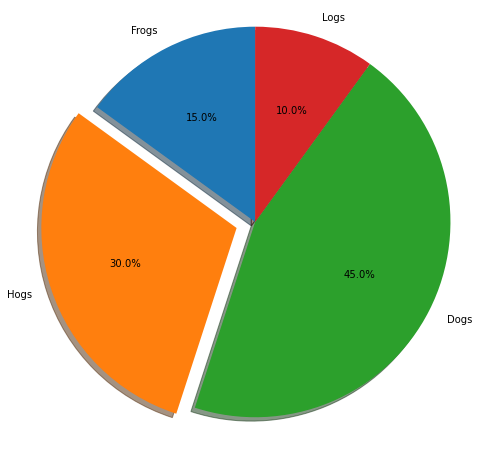

In [6]:
## Example from https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Priorización
Dato más importante debe utilizar elemento de mejor percepción.

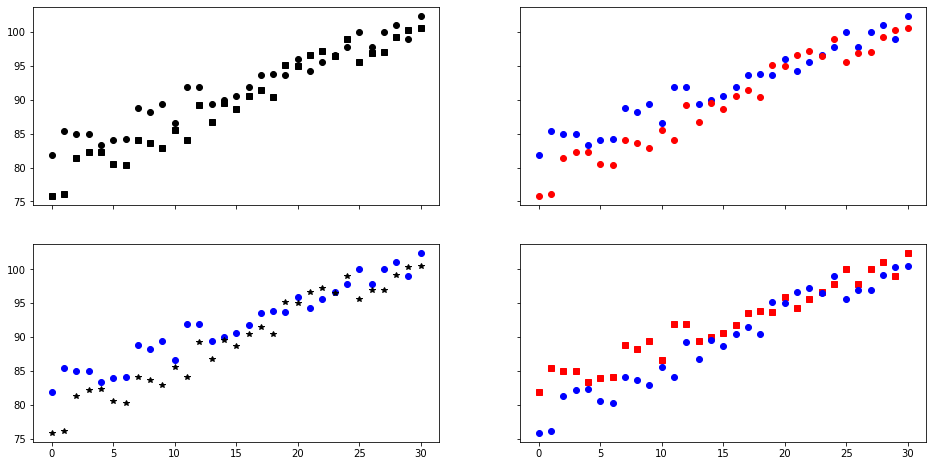

In [7]:
np.random.seed(42)
N = 31
x = np.arange(N)
y1 = 80 + 20 *x / N + 5 * np.random.rand(N)
y2 = 75 + 25 *x / N + 5 * np.random.rand(N)
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,8))

axs[0][0].plot(x, y1, 'ok')
axs[0][0].plot(x, y2, 'sk')

axs[0][1].plot(x, y1, 'ob')
axs[0][1].plot(x, y2, 'or')

axs[1][0].plot(x, y1, 'ob')
axs[1][0].plot(x, y2, '*k')

axs[1][1].plot(x, y1, 'sr')
axs[1][1].plot(x, y2, 'ob')

plt.show()

No todos los elementos tienen la misma percepción a nivel del sistema visual.

En particular, el color y la forma son elementos preatentivos: un color distinto o una forma distinta se reconocen de manera no conciente.

Ejemplos de elementos pre-atentivos.

![preatentivo1](../images/preatentivo1.png)

![preatentivo2](../images/preatentivo2.png)

¿En que orden creen que el sistema visual humano puede estimar los siguientes atributos visuales:
* Color
* Pendiente
* Largo
* Ángulo
* Posición
* Área
* Volumen

El sistema visual humano puede estimar con precisión siguientes atributos visuales:
1. Posición
2. Largo
3. Pendiente
4. Ángulo
5. Área
6. Volumen
7. Color

Utilice el atributo que se estima con mayor precisión cuando sea posible.

Puesto que la percepción del color tiene muy baja precisión, resulta ***inadecuado*** tratar de representar un valor numérico con colores.
* ¿Qué diferencia numérica existe entre el verde y el rojo?
* ¿Que asociación preexistente posee el color rojo, el amarillo y el verde?
* ¿Con cuánta precisión podemos distinguir valores en una escala de grises?

![colormap](../images/colormap.png)

Algunos ejemplos de colormaps

In [8]:
import matplotlib.cm as cm
from scipy.stats import multivariate_normal

In [9]:
x, y = np.mgrid[-3:3:.025, -2:2:.025]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
z1 = multivariate_normal.pdf(
    pos,
    mean=[-1.0, -1.0],
    cov=[[1.0, 0.0], [0.0, 0.1]]
)
z2 = multivariate_normal.pdf(
    pos, 
    mean=[1.0, 1.0],
    cov=[[1.5, 0.0], [0.0, 0.5]]
)
z = 10 * (z1 - z2)

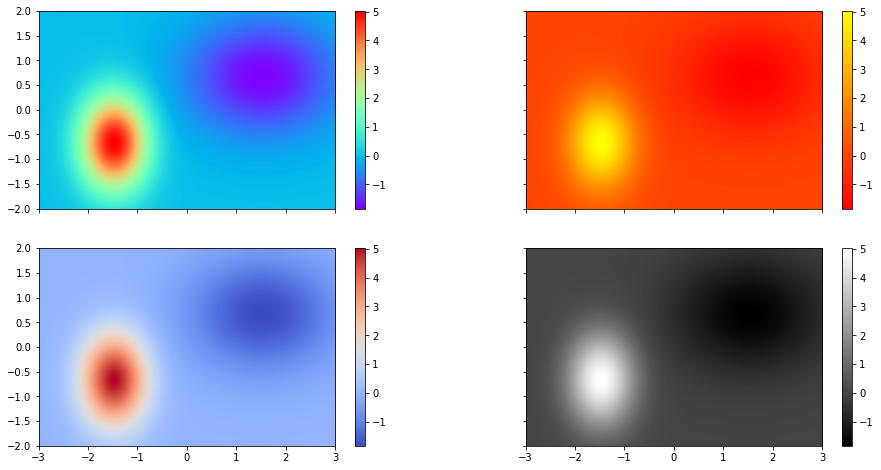

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), sharex=True, sharey=True)
cmaps = [cm.rainbow, cm.autumn, cm.coolwarm, cm.gray]

for i, ax in zip(range(len(cmaps)), axs.ravel()):
    im = ax.imshow(z, interpolation='bilinear', origin='lower',cmap=cmaps[i], extent=(-3, 3, -2, 2))
    fig.colorbar(im, ax=ax)
fig.show()

Consejo: evite mientras pueda los colormaps. Por ejemplo, utilizando contour plots.

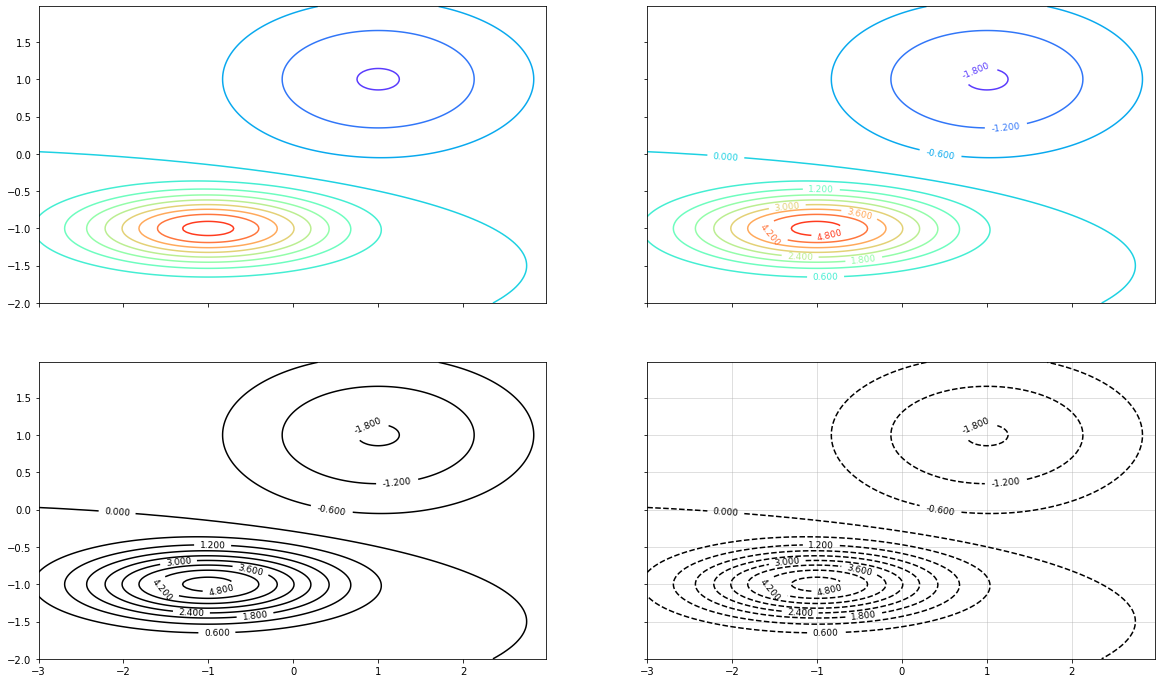

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
cmaps = [cm.rainbow, cm.autumn, cm.coolwarm, cm.gray]
countour_styles = [
    {"cmap": cm.rainbow},
    {"cmap": cm.rainbow},
    {"colors": "k", "linestyles": "solid"},
    {"colors": "k", "linestyles": "dashed"},
]

for i, ax in zip(range(len(cmaps)), axs.ravel()):
    cs = ax.contour(x, y, z, 11, **countour_styles[i])
    if i > 0:
        ax.clabel(cs, fontsize=9, inline=1)
    if i == 3:
        ax.grid(alpha=0.5)
fig.show()

#### Sobre la Expresividad
Mostrar los datos y sólo los datos. 

Los datos deben utilizar elementos con atribuciones adecuadas: _Not all data is born equal_.

Clasificación de datos:
* ***Datos Cuantitativos***: Cuantificación absoluta.
  * Cantidad de azúcar en fruta: 50 [gr/kg]
  * Operaciones =, $\neq$, <, >, +, −, * , /
* ***Datos Posicionales***: Cuantificación relativa.
  * Fecha de cosecha: 1 Agosto 2014, 2 Agosto 2014.
  * Operaciones =, $\neq$, <, >, +, −
* ***Datos Ordinales***: Orden sin cuantificación.
  * Calidad de la Fruta: baja, media, alta, exportación.
  * Operaciones =, $\neq$, <, >
* ***Datos Nominales***: Nombres o clasificaciones
  * Frutas: manzana, pera, kiwi, ...
  * Operaciones $=$, $\neq$

Ejemplo: Terremotos. ¿Que tipos de datos tenemos?
* Ciudad más próxima
* Año
* Magnitud en escala Richter
* Magnitud en escala Mercalli
* Latitud 
* Longitud

Contraejemplo: Compañías de computadores.

| Companía | Procedencia |
|----------|-------------|
| MSI  | Taiwan |
| Asus | Taiwan |
| Acer | Taiwan |
| HP | EEUU |
| Dell | EEUU |
| Apple | EEUU |
| Sony | Japon |
| Toshiba | Japon |
| Lenovo | Hong Kong |
| Samsung | Corea del Sur |


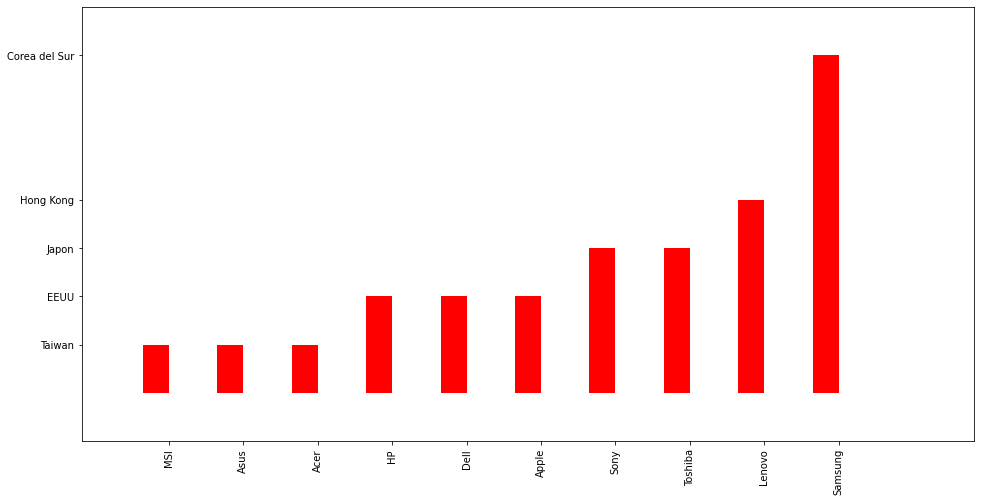

In [12]:
brands = {
    "MSI": "Taiwan",
    "Asus": "Taiwan",
    "Acer": "Taiwan",
    "HP": "EEUU",
    "Dell": "EEUU",
    "Apple": "EEUU",
    "Sony": "Japon",
    "Toshiba": "Japon",
    "Lenovo": "Hong Kong",
    "Samsung": "Corea del Sur"
}
C2N = {"Taiwan": 1, "EEUU": 2, "Japon": 3, "Hong Kong": 4, "Corea del Sur": 7}
x = np.arange(len(brands.keys()))
y = np.array([C2N[val] for val in brands.values()])
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x, y, width, color='r')
# add some text for labels, title and axes ticks
ax.set_xticks(x + 0.5*width)
ax.set_xticklabels(brands.keys(), rotation="90")
ax.set_yticks(list(C2N.values()))
ax.set_yticklabels(C2N.keys())
plt.xlim([-1,len(x)+1])
plt.ylim([-1,y.max()+1])
plt.show()

Clasificación de datos:
* ***Datos Cuantitativos***: Cuantificación absoluta.
  * Cantidad de azúcar en fruta: 50 [gr/kg]
  * Operaciones =, $\neq$, <, >, +, −, * , /
    * **Utilizar posición, largo, pendiente o ángulo**  
* ***Datos Posicionales***: Cuantificación relativa.
  * Fecha de cosecha: 1 Agosto 2014, 2 Agosto 2014.
  * Operaciones =, $\neq$, <, >, +, −
    * **Utilizar posición, largo, pendiente o ángulo**
* ***Datos Ordinales***: Orden sin cuantificación.
  * Calidad de la Fruta: baja, media, alta, exportación.
  * Operaciones =, $\neq$, <, >
    * **Utilizar marcadores diferenciados en forma o tamaño, o mapa de colores apropiado**
* ***Datos Nominales***: Nombres o clasificaciones
  * Frutas: manzana, pera, kiwi, ...
  * Operaciones $=$, $\neq$
    * **Utilizar forma o color**


#### Consistencia

La codificación visual debe permitir reproducir datos. Para ello debemos:
* Graficar datos que sean comparables.
* Utilizar ejes escalados adecuadamente.
* Utilizar la misma codificación visual entre gráficos similares.

Utilizar ejes escalados adecuadamente.

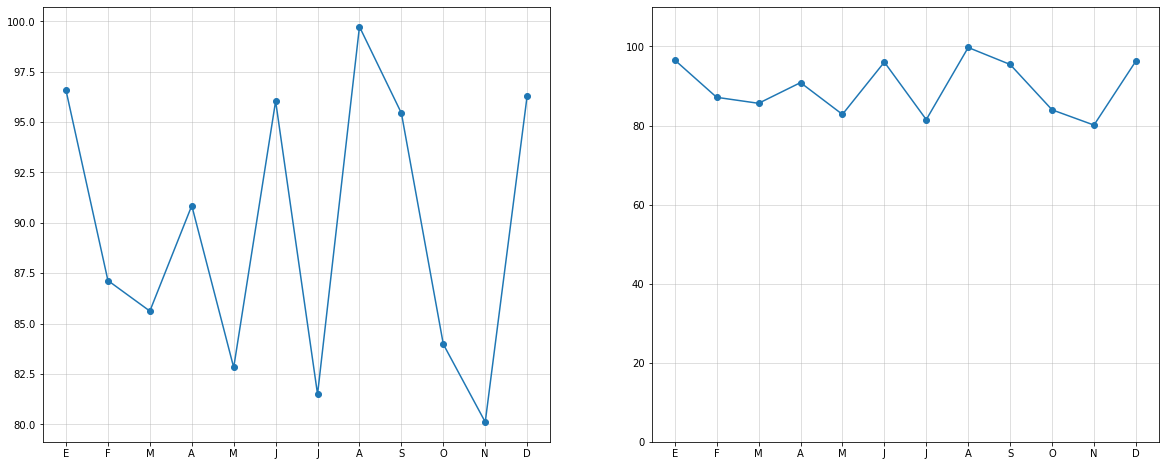

In [13]:
x = list(range(1, 13))
y = 80 + 20 * np.random.rand(12)
x_ticks = list("EFMAMJJASOND")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.plot(x, y, 'o-')
ax1.set_xticks(x)
ax1.set_xticklabels(x_ticks)
ax1.grid(alpha=0.5)

ax2.plot(x, y,'o-')
ax2.set_xticks(x)
ax2.set_xticklabels(x_ticks)
ax2.set_ylim([0, 110])
ax2.grid(alpha=0.5)

fig.show()

Utilizar la misma codificación visual entre gráficos similares

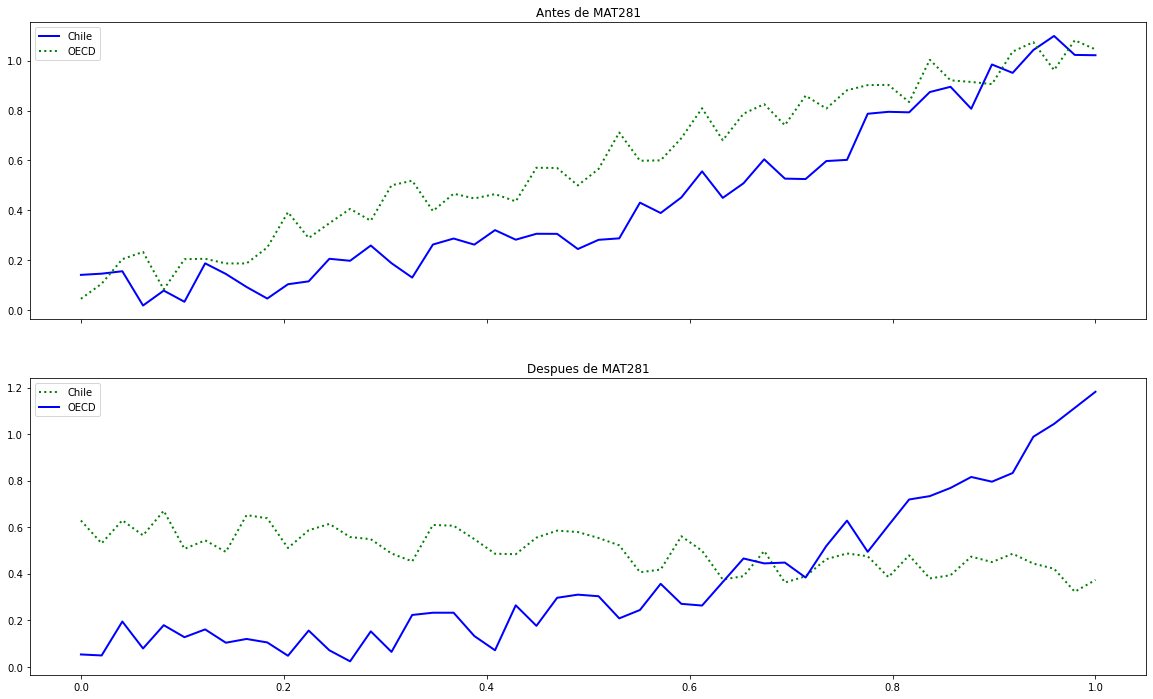

In [14]:
x = np.linspace(0, 1, 50)
f1 =  x ** 2 + .2 * np.random.rand(50)
g1 =  x + .2 * np.random.rand(50)
f2 = 0.5 - 0.2 * x + .2 * np.random.rand(50)
g2 = x ** 3 + .2 * np.random.rand(50)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 12), sharex=True)

ax1.set_title("Antes de MAT281")
ax1.plot(x, f1, 'b', label='Chile', lw=2.0)
ax1.plot(x, g1, 'g:', label='OECD', lw=2.0)
ax1.legend(loc="upper left")

ax2.set_title("Despues de MAT281")
ax2.plot(x, f2, 'g:', label='Chile', lw=2.0)
ax2.plot(x, g2, 'b', label='OECD', lw=2.0)
ax2.legend()

fig.show()

## Python Viz Landscape

Para empezar, [PyViz](https://pyviz.org/) es un sitio web que se dedica a ayudar a los usuarios a decidir dentro de las mejores herramientas de visualización open-source implementadas en Python, dependiendo de sus necesidades y objetivos. Mucho de lo que se menciona en esta sección está en detalle en la página web del proyecto PyViz.

Algunas de las librerías de visualización de Python más conocidas son:

![landscape](../images/landscape.png)

Este esquema es una adaptación de uno presentado en la charla [_The Python Visualization Landscape_](https://us.pycon.org/2017/schedule/presentation/616/) realizada por [Jake VanderPlas](http://vanderplas.com/) en la PyCon 2017.

Cada una de estas librerías fue creada para satisfacer diferentes necesidades, algunas han ganado más adeptos que otras por uno u otro motivo. Tal como avanza la tecnología, estas librerías se actualizan o se crean nuevas, la importancia no recae en ser un experto en una, si no en saber adaptarse a las situaciones, tomar la mejor decicisión y escoger según nuestras necesidades y preferencias. Por ejemplo, `matplotlib` nació como una solución para imitar los gráficos de `MATLAB` (puedes ver la historia completa [aquí](https://matplotlib.org/users/history.html)), manteniendo una sintaxis similar y con ello poder crear gráficos __estáticos__ de muy buen nivel.

Debido al éxito de `matplotlib` en la comunidad, nacen librerías basadas ella. Algunos ejemplos son:

- `seaborn` se basa en `matpĺotlib` pero su nicho corresponde a las visualizaciones estadísticas.
- `ggpy` una suerte de copia a `ggplot2` perteneciente al lenguaje de programación `R`.
- `networkx` visualizaciones de grafos.
- `pandas` no es una librería de visualización propiamente tal, pero utiliza a `matplotplib` como _bakcned_ en los métodos con tal de crear gráficos de manera muy rápida, e.g. `pandas.DataFrame.plot.bar()`

Por otro lado, con tal de crear visualizaciones __interactivas__ aparecen librerías basadas en `javascript`, algunas de las más conocidas en Python son:

- `bokeh` tiene como objetivo proporcionar gráficos versátiles, elegantes e incluso interactivos, teniendo una gran performance con grandes datasets o incluso streaming de datos.
- `plotly` visualizaciones interactivas que en conjunto a `Dash` (de la misma empresa) permite crear aplicaciones webs, similar a `shiny` de `R`.

`D3.js` a pesar de estar basado en `javascript` se ha ganado un lugar en el corazón de toda la comunidad, debido a la ilimitada cantidad de visualizaciones que son posibles de hacer, por ejemplo, la [malla interactiva](https://mallas.labcomp.cl/) que hizo un estudiante de la UTFSM está hecha en `D3.js`. 

De las librerías más recientes está `Altair`, que consiste en visualizaciones declarativas (ya lo veremos en el próximo laboratorio). Construída sobre `Vega-Lite`, a su vez que esté está sobre `Vega` y este finalmente sobre `D3.js`. `Altair` permite crear visualizaciones estáticas e interactivas con pocas líneas de código, sin embargo, al ser relativamente nueva, aún existen funcionalidades en desarrollo o que simplemente aún no existen en esta librería pero en otras si.

__Clasificación__

En lo concierne a nosotros, una de las principales clasificaciones para estas librerías es si crean visualizaciones __estática__ y/o __interactivas__. La interactividad es un plus que permite adentrarse en los datos en distintos niveles, si agregamos que ciertas librerías permiten crear _widgets_ (algo así como complementos a las visualizaciones) su potencial aumenta. Por ejemplo, un widget podría ser un filtro que permita escoger un país; en una librería estática tendrías que crear un gráfico por cada país (o combinación de países) lo cual no se hace escalable y cómodo para trabajar. 

__Spoilers__

Las próximas clases se centrarán en `matplotlib` y `Altair`, dado que son buenos exponentes de visualización imperativa y declarativa, respectivamente.

Finalmente, siempre hay que tener en consideración la manera en que se compartirán las visualizaciones, por ejemplo, si es para un artículo científico bastaría que fuese de buena calidad y estático. Si es para una plataforma web es necesario que sea interactivo, aquí es donde entran en juego los dashboards, que permiten la exploración de datos de manera interactiva. En Python existen librerías como `Dash` o `Panel`, sin embargo, en el mundo empresarial se suele utilizar software dedicado a esto, como `Power BI` o `Tableau`.

## Resumen
Elementos para la creación de una buena visualización
* ***Honestidad***: representaciones visuales no deben engañar al observador.
* ***Priorización***: dato más importante debe utilizar elemento de mejor percepción.
* ***Expresividad***: datos deben utilizar elementos con atribuciones adecuadas.
* ***Consistencia***: codificación visual debe permitir reproducir datos.

El principio básico a respetar es que a partir del gráfico uno debe poder re-obtener fácilmente los datos originales.